In [1]:
import ROOT as rt
import uproot
# from root_numpy import root2array, tree2array
#from root_pandas import read_root
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

import gpustat
gpustat.print_gpustat()
os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/02
gpu-ibanks-3.hep.caltech.edu  Thu Nov  4 15:46:22 2021  470.57.02
[0] NVIDIA GeForce GTX 1080 | 24'C,   0 % |     4 /  8119 MB |
[1] NVIDIA GeForce GTX 1080 | 54'C,   0 % |  7231 /  8119 MB | 3054(7227M)
[2] NVIDIA GeForce GTX 1080 | 55'C,   0 % |  7243 /  8119 MB | 3054(7239M)
[3] NVIDIA GeForce GTX 1080 | 47'C,   0 % |  7219 /  8119 MB | 3054(7215M)
[4] NVIDIA GeForce GTX 1080 | 50'C,   0 % |  7219 /  8119 MB | 3054(7215M)
[5] NVIDIA GeForce GTX 1080 | 26'C,   0 % |   727 /  8119 MB | 3012(723M)
[6] NVIDIA GeForce GTX 1080 | 50'C,   0 % |  6669 /  8119 MB | 3054(6665M)
[7] NVIDIA GeForce GTX 1080 | 29'C,   0 % |     4 /  8119 MB |


In [4]:
def samp_to_df(samp_name):
    file_name = f'ML/DNN_Trees/combine_sequential_DNN/post_ms/{samp_name}_3.root'
    samp_file = uproot.open(file_name)
    samp_array = samp_file['tree'].arrays()
    samp_df = pd.DataFrame(samp_array)
    return samp_df

def data_to_df(samp_name):
    file_name = f'ML/DNN_Trees/combine_sequential_DNN/post_ms/{samp_name}_3.root'
    samp_file = uproot.open(file_name)
    samp_array = samp_file['tree'].arrays()
    samp_df = pd.DataFrame(samp_array)
    return samp_df

In [7]:
samples = ['sig', 'VBFHToGG', 'VHToGG', 'ttHToGG', 'GluGluHtoGG', 'nonres']
dfs = []
for samp in samples:
    dfs.append(samp_to_df(samp))

data_df = data_to_df('data_result')
data_sideband_df = data_to_df('data_sideband')

In [8]:
cat1_dfs = []
cat2_dfs = []
for df in dfs:
    c1_df = df[df[b'mass_sculpt_cut_sm'] == 1]
    c2_df = df[df[b'mass_sculpt_cut_sm'] == 0]
    cat1_dfs.append(c1_df)
    cat2_dfs.append(c2_df)
    
data_df_cat1 = data_df[data_df[b'mass_sculpt_cut_sm']==1]
data_df_cat2 = data_df[data_df[b'mass_sculpt_cut_sm']==0]

In [9]:
for i in range(len(samples)):
    print(samples[i])
    weight_1 = cat1_dfs[i].loc[:,b'genweight_scale'].values
    weight_2 = cat2_dfs[i].loc[:, b'genweight_scale'].values
    c1_yield = np.sum(weight_1)
    c2_yield = np.sum(weight_2)
    num_event_c1 = weight_1.shape[0]
    num_event_c2 = weight_2.shape[0]
    print(f'Cat 1 Yield: {c1_yield}')
    print(f'Cat 2 Yield: {c2_yield}')
    print(f'Cat 1 #: {num_event_c1}')
    print(f'Cat 2 #: {num_event_c2}')
    print('\n')
    
print('Data')
c1_yield = np.sum(data_df_cat1.loc[:,b'genweight'].values)
c2_yield = np.sum(data_df_cat2.loc[:, b'genweight'].values)
print(f'Cat 1 Yield: {c1_yield}')
print(f'Cat 2 Yield: {c2_yield}')
print('\n')

sig
Cat 1 Yield: 1.7068664197030308
Cat 2 Yield: 0.4534242302715334
Cat 1 #: 18509
Cat 2 #: 4510


VBFHToGG
Cat 1 Yield: 1.0959048521002912
Cat 2 Yield: 31.908718998874054
Cat 1 #: 786
Cat 2 #: 22704


VHToGG
Cat 1 Yield: 5.21994282552886
Cat 2 Yield: 72.39681996404366
Cat 1 #: 1908
Cat 2 #: 28383


ttHToGG
Cat 1 Yield: 1.1280430728032806
Cat 2 Yield: 6.878488122710591
Cat 1 #: 3638
Cat 2 #: 22215


GluGluHtoGG
Cat 1 Yield: 12.939088373359791
Cat 2 Yield: 433.44019716275335
Cat 1 #: 893
Cat 2 #: 25407


nonres
Cat 1 Yield: 10543.927368493842
Cat 2 Yield: 321015.0763927506
Cat 1 #: 20799
Cat 2 #: 485916


Data
Cat 1 Yield: 21921.0
Cat 2 Yield: 393419.0




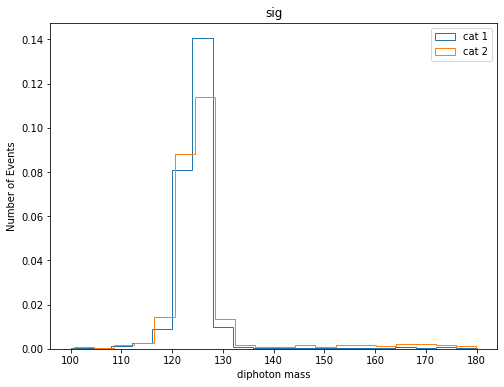

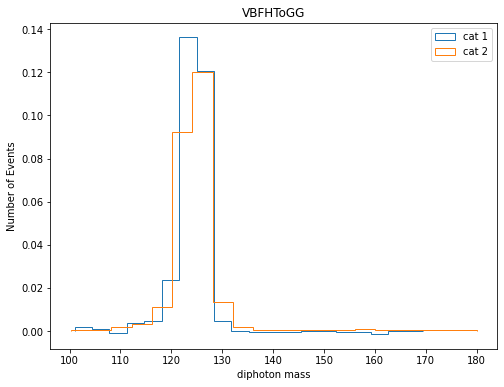

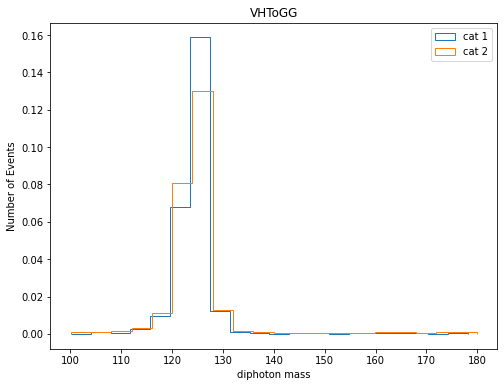

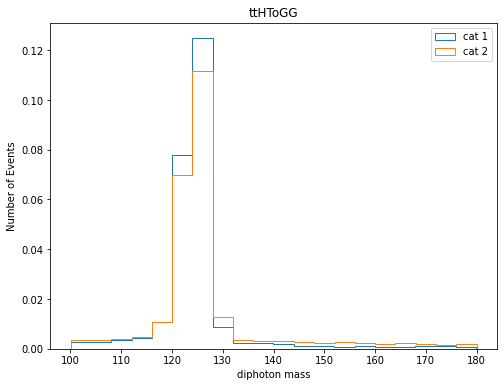

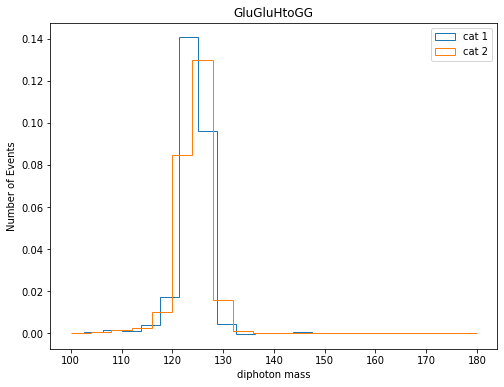

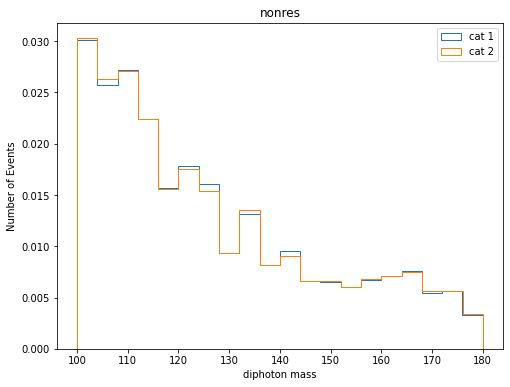

In [7]:
for i in range(len(samples)):
    plt.figure()
    plt.hist(cat1_dfs[i][b'diphoton_mass'], bins=20, histtype='step', label='cat 1', weights = cat1_dfs[i][b'genweight_scale'], density = True) 
    plt.hist(cat2_dfs[i][b'diphoton_mass'], bins=20, histtype='step', label='cat 2', weights = cat2_dfs[i][b'genweight_scale'], density = True)
    plt.xlabel('diphoton mass')
    plt.ylabel("Number of Events")
    plt.title(f'{samples[i]}')
    plt.legend(loc='best')
    figure = plt.gcf()
    figure.set_size_inches(8, 6)
    #plt.savefig(fname = f'Plots/Data_MC_Plots/{year[y]}/recon(pho_80)/{plt_vars[x].decode("utf-8")}_{year[y]}_recon(pho_80).png', format='png', dpi = 100)
    plt.show()
    plt.close()

combine -M AsymptoticLimits -m 125 -n v1 /storage/af/user/schen7/CMSSW_9_4_2/src/Higgs/HHbbgg/HHbbggAna/script/datacards/HHbbgg_datacard.txt --saveWorkspace --saveToys --run blind
